## Project Name: Image Classification with CNN
In this project we are going to classify images of several  object and animals. We are going to apply a famous deep learning model called as Convolutional Neural Network or more commonly known as CNN.

### Calling the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import warnings

warnings.filterwarnings('ignore')

### Calling the Datasets

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
classes = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# lets see the shape of the dataset
print(f'''
X_train: {X_train.shape}
y_train: {y_train.shape}
X_test: {X_test.shape}
y_test: {y_test.shape}
''')


X_train: (50000, 32, 32, 3)
y_train: (50000, 1)
X_test: (10000, 32, 32, 3)
y_test: (10000, 1)



In [ ]:
# let's check out individual values of the dataset

import matplotlib.pyplot as plt

def show_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.title(classes[y[index]])

In [ ]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

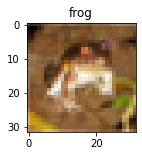

In [ ]:
show_sample(X_train, y_train, 0)

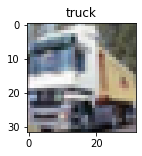

In [ ]:
show_sample(X_train, y_train, 1)

In [ ]:
# normalizing the values
X_train = X_train/255
X_test = X_test/255

### Applying the CNN

In [ ]:
cnn = keras.Sequential([
    # cnn
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',  input_shape=(32, 32, 3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',  input_shape=(32, 32, 3)),
    keras.layers.MaxPool2D(2,2),

    # dense layer
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4569 - accuracy: 0.4730
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1231 - accuracy: 0.6067
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9881 - accuracy: 0.6556
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9027 - accuracy: 0.6868
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8373 - accuracy: 0.7103
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7826 - accuracy: 0.7288
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7340 - accuracy: 0.7441
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6882 - accuracy: 0.7614
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6488 - accuracy: 0.7750
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.606

In [ ]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9434 - accuracy: 0.7006


[0.9433887600898743, 0.7006000280380249]

### Prediction

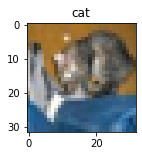

In [ ]:
# original
show_sample(X_test, y_test, 0)

In [ ]:
# predicted 
classes[np.argmax(cnn.predict(X_test[0].reshape(1,32,32,3)))]

'cat'

### Model Performance

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
y_pred = [np.argmax(x) for x in cnn.predict(X_test)]
y_pred[:5]

[3, 8, 8, 0, 3]

In [ ]:
# let's find out the classification report

from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(f'Classification Report: \n {cr}')

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.82      0.74      1000
           1       0.80      0.85      0.82      1000
           2       0.68      0.54      0.60      1000
           3       0.50      0.52      0.51      1000
           4       0.73      0.58      0.65      1000
           5       0.50      0.73      0.59      1000
           6       0.82      0.75      0.78      1000
           7       0.80      0.71      0.75      1000
           8       0.79      0.83      0.81      1000
           9       0.88      0.67      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.72      0.70      0.70     10000
weighted avg       0.72      0.70      0.70     10000



Text(0.5, 1.0, 'Confusion Matrix')

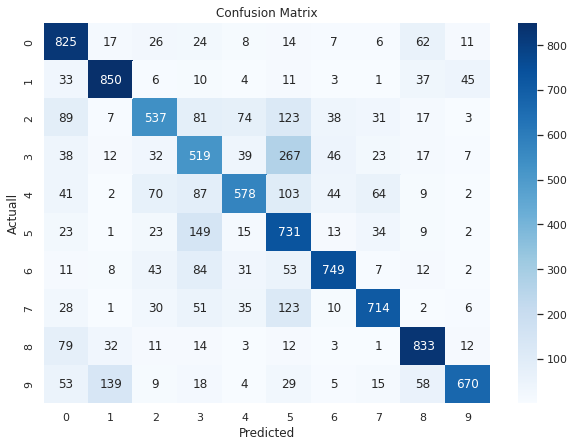

In [ ]:
# we will also find out the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuall')
plt.title('Confusion Matrix')
